# Task L17
## Import the required libraries

In [21]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import networkx as nx

# Grouping transactions

In [22]:
transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).tolist()

# One-hot encoding

In [23]:
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

# Frequent sets (low threshold)

In [24]:
frequent_itemsets = apriori(df_encoded, min_support=0.001, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

# Top 20 output

In [25]:
top20_rules = rules.sort_values(by='lift', ascending=False).head(20)
print("Top 20 Association Rules:")
print(top20_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Top 20 Association Rules:
             antecedents   consequents   support  confidence      lift
1      (sausage, yogurt)  (whole milk)  0.001470    0.255814  1.619866
0  (sausage, rolls/buns)  (whole milk)  0.001136    0.212500  1.345594


# Graph construction

In [27]:
G = nx.DiGraph()
for _, row in top20_rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['lift'])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.7)
edges = G.edges(data=True)

nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
nx.draw_networkx_edges(G, pos, edge_color='gray', width=2, arrows=True)
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Graph of associative rules (Top 20)")
plt.axis('off')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

# Apply nodes and edges

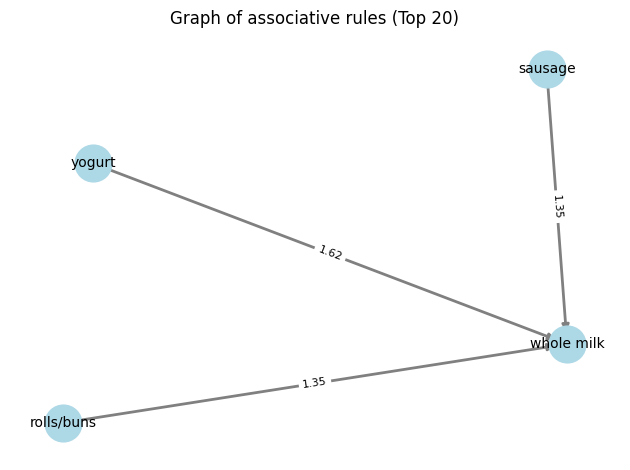